# Customer Lifetime Value  (CLV) Calculation based on RFM

Customer Lifetime Value(CLV) represents the total amount of money a customer is expected to spend with your business over their lifetime. This is an important figure that deterimines how much money you need to spend on aquiring new cusotmers or retaining existing ones. It also guide the marketing campaigns to mangage profitable customer relationships. 

This Python code will guide you through the entire CLV calculation process. It segments customers based on the RFM method and calculates the average CLV for each customer group over one year. By defining the churn rate by year, we can get information on how many months customers continue to spend before they churn. After multiplying it with the average CLV, we finally get the litetime value for each group of customers.  

Let's take a closer look.

### 1. Prepare data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Load and check the data:

In [2]:
df = pd.read_csv('online_clean.csv', sep='|')

In [3]:
df.head(20)

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
0,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
1,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28,4.25,14590.0,United Kingdom,2010-01-04
2,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
3,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28,4.25,14590.0,United Kingdom,2010-01-04
4,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28,6.95,14590.0,United Kingdom,2010-01-04
5,493414,21531,RETRO SPOT SUGAR JAM BOWL,24,2010-01-04 10:28,2.10,14590.0,United Kingdom,2010-01-04
6,493427,82483,WOOD 2 DRAWER CABINET WHITE FINISH,4,2010-01-04 10:43,5.95,13287.0,United Kingdom,2010-01-04
7,493427,21681,GIANT MEDINA STAMPED METAL BOWL,2,2010-01-04 10:43,9.95,13287.0,United Kingdom,2010-01-04
8,493427,21682,LARGE MEDINA STAMPED METAL BOWL,4,2010-01-04 10:43,4.95,13287.0,United Kingdom,2010-01-04
9,493427,18096C,WHITE ROUND PORCELAIN TLIGHT HOLDER,6,2010-01-04 10:43,2.55,13287.0,United Kingdom,2010-01-04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685559 entries, 0 to 685558
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice       685559 non-null  int64  
 1   StockCode     685559 non-null  object 
 2   Description   685559 non-null  object 
 3   Quantity      685559 non-null  int64  
 4   Invoice_time  685559 non-null  object 
 5   Price         685559 non-null  float64
 6   CustomerID    685559 non-null  float64
 7   Country       685559 non-null  object 
 8   Purchase_dt   685559 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 47.1+ MB


- Convert object to date

In [5]:
df['Purchase_dt']=pd.to_datetime(df['Purchase_dt'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685559 entries, 0 to 685558
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       685559 non-null  int64         
 1   StockCode     685559 non-null  object        
 2   Description   685559 non-null  object        
 3   Quantity      685559 non-null  int64         
 4   Invoice_time  685559 non-null  object        
 5   Price         685559 non-null  float64       
 6   CustomerID    685559 non-null  float64       
 7   Country       685559 non-null  object        
 8   Purchase_dt   685559 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 47.1+ MB


### 2. Calculate Churn Rate

- Check date range

In [7]:
# change 'Invoice_time' to date type.
df['Invoice_time'] = pd.to_datetime(df['Invoice_time'])

In [8]:
df.head(10)

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
0,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,United Kingdom,2010-01-04
1,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,United Kingdom,2010-01-04
2,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590.0,United Kingdom,2010-01-04
3,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590.0,United Kingdom,2010-01-04
4,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28:00,6.95,14590.0,United Kingdom,2010-01-04
5,493414,21531,RETRO SPOT SUGAR JAM BOWL,24,2010-01-04 10:28:00,2.10,14590.0,United Kingdom,2010-01-04
6,493427,82483,WOOD 2 DRAWER CABINET WHITE FINISH,4,2010-01-04 10:43:00,5.95,13287.0,United Kingdom,2010-01-04
7,493427,21681,GIANT MEDINA STAMPED METAL BOWL,2,2010-01-04 10:43:00,9.95,13287.0,United Kingdom,2010-01-04
8,493427,21682,LARGE MEDINA STAMPED METAL BOWL,4,2010-01-04 10:43:00,4.95,13287.0,United Kingdom,2010-01-04
9,493427,18096C,WHITE ROUND PORCELAIN TLIGHT HOLDER,6,2010-01-04 10:43:00,2.55,13287.0,United Kingdom,2010-01-04


In [9]:
# check date range in whole dataframe.
(df['Purchase_dt'].min(),df['Purchase_dt'].max())

(Timestamp('2010-01-04 00:00:00'), Timestamp('2011-12-23 00:00:00'))

- Select one year data as observation window, and create a dataframe (df_obs) for this period.

In [10]:
df_obs = df.loc[(df['Purchase_dt'] >= '2010-02-01') & (df['Purchase_dt'] <= '2011-01-31')]

In [11]:
df_obs['Purchase_dt'].unique()

array(['2010-02-01T00:00:00.000000000', '2010-02-02T00:00:00.000000000',
       '2010-02-03T00:00:00.000000000', '2010-02-04T00:00:00.000000000',
       '2010-02-05T00:00:00.000000000', '2010-02-07T00:00:00.000000000',
       '2010-02-08T00:00:00.000000000', '2010-02-09T00:00:00.000000000',
       '2010-02-10T00:00:00.000000000', '2010-02-11T00:00:00.000000000',
       '2010-02-12T00:00:00.000000000', '2010-02-14T00:00:00.000000000',
       '2010-02-15T00:00:00.000000000', '2010-02-16T00:00:00.000000000',
       '2010-02-17T00:00:00.000000000', '2010-02-18T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-21T00:00:00.000000000',
       '2010-02-22T00:00:00.000000000', '2010-02-23T00:00:00.000000000',
       '2010-02-24T00:00:00.000000000', '2010-02-25T00:00:00.000000000',
       '2010-02-26T00:00:00.000000000', '2010-02-28T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-03-02T00:00:00.000000000',
       '2010-03-03T00:00:00.000000000', '2010-03-04

In [12]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345194 entries, 19251 to 364444
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       345194 non-null  int64         
 1   StockCode     345194 non-null  object        
 2   Description   345194 non-null  object        
 3   Quantity      345194 non-null  int64         
 4   Invoice_time  345194 non-null  datetime64[ns]
 5   Price         345194 non-null  float64       
 6   CustomerID    345194 non-null  float64       
 7   Country       345194 non-null  object        
 8   Purchase_dt   345194 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 26.3+ MB


- Create the dataframe (df_after) for post-observation period.

In [13]:
df_after = df.loc[df['Purchase_dt'] > '2011-01-31']

In [14]:
df_after['Purchase_dt'].unique()

array(['2011-02-01T00:00:00.000000000', '2011-02-02T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-02-04T00:00:00.000000000',
       '2011-02-06T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-02-08T00:00:00.000000000', '2011-02-09T00:00:00.000000000',
       '2011-02-10T00:00:00.000000000', '2011-02-11T00:00:00.000000000',
       '2011-02-13T00:00:00.000000000', '2011-02-14T00:00:00.000000000',
       '2011-02-15T00:00:00.000000000', '2011-02-16T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-18T00:00:00.000000000',
       '2011-02-20T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-02-22T00:00:00.000000000', '2011-02-23T00:00:00.000000000',
       '2011-02-24T00:00:00.000000000', '2011-02-25T00:00:00.000000000',
       '2011-02-27T00:00:00.000000000', '2011-02-28T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-03-02T00:00:00.000000000',
       '2011-03-03T00:00:00.000000000', '2011-03-04

In [15]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321114 entries, 364445 to 685558
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       321114 non-null  int64         
 1   StockCode     321114 non-null  object        
 2   Description   321114 non-null  object        
 3   Quantity      321114 non-null  int64         
 4   Invoice_time  321114 non-null  datetime64[ns]
 5   Price         321114 non-null  float64       
 6   CustomerID    321114 non-null  float64       
 7   Country       321114 non-null  object        
 8   Purchase_dt   321114 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 24.5+ MB


- Check which customers are still retained for the next year. 
 Return customers in both observation window (df_obs) and customers post-observation window (df_after).

In [16]:
df_obs['CustomerID'].unique()

array([14739., 14370., 16684., ..., 14502., 16403., 17619.])

In [17]:
# list unique customers in df_obs.
cus_list=df_obs['CustomerID'].unique()

In [18]:
cus_list.shape

(3894,)

In [19]:
# list unique customers in df_after.
cus_after_list=df_after['CustomerID'].unique()

In [20]:
cus_after_list.shape

(3857,)

In [21]:
# Check whether customers in obs window repurchased.
np.isin(cus_list,cus_after_list)

array([ True, False,  True, ...,  True, False, False])

In [22]:
np.isin(cus_list,cus_after_list).shape

(3894,)

- Define churned customers.

In [23]:
num_remain = cus_list[np.isin(cus_list,cus_after_list)]

In [24]:
num_remain.shape

(2491,)

In [25]:
num_remain

array([14739., 16684., 14047., ..., 17329., 16897., 14502.])

In [26]:
num_left = cus_list[~np.isin(cus_list, cus_after_list)]

In [27]:
num_left.shape

(1403,)

- Calculate churn rate.

In [28]:
churn_rate = num_left.shape[0] / cus_list.shape[0]

In [29]:
print(churn_rate)

0.3602978941961993


### 3. Calculate RFM score

Calculate R(Recency),F(Frequency),M(monetary) score，then calculate total RFM Score:

- Recency: the period between last purchase and 'current'
- Frequency: the average number of purchase within a concern period
- Monetary: the average purhcase dollar amount within a concern period

#### 3.1 Recency:

- Define 'current' time.

In [30]:
# extract data in observation window(df_obs) to new dataframe (df_rfm).
df_rfm = df_obs.copy()

In [31]:
# create new column 'current' with date value '2011-02-01'.
df_rfm['current'] = pd.to_datetime('2011-02-01')

In [32]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345194 entries, 19251 to 364444
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       345194 non-null  int64         
 1   StockCode     345194 non-null  object        
 2   Description   345194 non-null  object        
 3   Quantity      345194 non-null  int64         
 4   Invoice_time  345194 non-null  datetime64[ns]
 5   Price         345194 non-null  float64       
 6   CustomerID    345194 non-null  float64       
 7   Country       345194 non-null  object        
 8   Purchase_dt   345194 non-null  datetime64[ns]
 9   current       345194 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 29.0+ MB


In [33]:
df_rfm['current'].shape

(345194,)

 - Create a new column ('range') to calculate the difference between the purchase date and the current date. 

In [34]:
df_rfm['Purchase_dt']=pd.to_datetime(df_rfm['Purchase_dt'])

In [35]:
df_rfm['range']=df_rfm['current']-df_rfm['Purchase_dt']

In [36]:
df_rfm.head(10)

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range
19251,496349,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19252,496349,21524,SPOTTY HOME SWEET HOME DOORMAT,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19253,496349,48116,DOOR MAT MULTICOLOUR STRIPE,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19254,496349,48129,DOOR MAT TOPIARY,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19255,496349,48138,DOOR MAT UNION FLAG,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19256,496349,48189,DOOR MAT FRIENDSHIP,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19257,496349,48194,DOORMAT HEARTS,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19258,496349,48197,DOOR MAT BIRD ON THE WIRE,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19259,496349,84971S,SMALL HEART FLOWERS HOOK,24,2010-02-01 08:13:00,0.85,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19260,496349,85178,VICTORIAN SEWING KIT,12,2010-02-01 08:13:00,1.25,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days


 - Return the minimal value of  'range' for each cusotmer.

In [37]:
df_rfm.groupby('CustomerID')['range'].min()

CustomerID
12346.0    14 days
12608.0    93 days
12745.0   175 days
12746.0   229 days
12747.0    12 days
            ...   
18283.0     9 days
18284.0   120 days
18285.0   349 days
18286.0   165 days
18287.0    71 days
Name: range, Length: 3894, dtype: timedelta64[ns]

In [38]:
# check:
df_rfm.loc[df_rfm['CustomerID']==18283.0]

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range
33418,498547,20971,PINK BLUE FELT CRAFT TRINKET BOX,1,2010-02-19 17:16:00,1.25,18283.0,United Kingdom,2010-02-19,2011-02-01,347 days
33419,498547,84836,ZINC METAL HEART DECORATION,1,2010-02-19 17:16:00,1.25,18283.0,United Kingdom,2010-02-19,2011-02-01,347 days
33420,498547,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-02-19 17:16:00,2.95,18283.0,United Kingdom,2010-02-19,2011-02-01,347 days
33421,498547,22069,BROWN PIRATE TREASURE CHEST,2,2010-02-19 17:16:00,1.65,18283.0,United Kingdom,2010-02-19,2011-02-01,347 days
33422,498547,20969,RED FLORAL FELTCRAFT SHOULDER BAG,1,2010-02-19 17:16:00,3.75,18283.0,United Kingdom,2010-02-19,2011-02-01,347 days
...,...,...,...,...,...,...,...,...,...,...,...
358733,541854,21870,I CAN ONLY PLEASE ONE PERSON MUG,6,2011-01-23 14:58:00,1.25,18283.0,United Kingdom,2011-01-23,2011-02-01,9 days
358734,541854,22649,STRAWBERRY FAIRY CAKE TEAPOT,1,2011-01-23 14:58:00,4.95,18283.0,United Kingdom,2011-01-23,2011-02-01,9 days
358735,541854,21068,VINTAGE BILLBOARD LOVE/HATE MUG,6,2011-01-23 14:58:00,1.25,18283.0,United Kingdom,2011-01-23,2011-02-01,9 days
358736,541854,21874,GIN AND TONIC MUG,3,2011-01-23 14:58:00,1.25,18283.0,United Kingdom,2011-01-23,2011-02-01,9 days


#### 3.2 Frequency:

In [39]:
df_rfm.groupby('CustomerID')['Invoice'].nunique()

CustomerID
12346.0     3
12608.0     1
12745.0     2
12746.0     1
12747.0    15
           ..
18283.0     8
18284.0     1
18285.0     1
18286.0     1
18287.0     4
Name: Invoice, Length: 3894, dtype: int64

In [40]:
#  check:
df_rfm.loc[df_rfm['CustomerID']==12346.0]

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range
41520,499763,20682,RED SPOTTY CHILDS UMBRELLA,1,2010-03-02 13:08:00,3.25,12346.0,United Kingdom,2010-03-02,2011-02-01,336 days
41521,499763,20679,EDWARDIAN PARASOL RED,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-02,2011-02-01,336 days
41522,499763,15056N,EDWARDIAN PARASOL NATURAL,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-02,2011-02-01,336 days
41523,499763,15056BL,EDWARDIAN PARASOL BLACK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-02,2011-02-01,336 days
41524,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-02,2011-02-01,336 days
144671,513774,21524,DOORMAT SPOTTY HOME SWEET HOME,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-28,2011-02-01,218 days
144672,513774,22692,DOORMAT WELCOME TO OUR HOME,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-28,2011-02-01,218 days
144673,513774,22660,DOORMAT I LOVE LONDON,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-28,2011-02-01,218 days
144674,513774,22687,DOORMAT CHRISTMAS VILLAGE,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-28,2011-02-01,218 days
144675,513774,48173C,DOORMAT BLACK FLOCK,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-28,2011-02-01,218 days


#### 3.3 Monetary:

In [41]:
# create new column 'TotalPrrice' for indicating Monetary value. 
df_rfm['TotalPrice'] = df_rfm['Quantity'] * df_rfm['Price']

In [42]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345194 entries, 19251 to 364444
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   Invoice       345194 non-null  int64          
 1   StockCode     345194 non-null  object         
 2   Description   345194 non-null  object         
 3   Quantity      345194 non-null  int64          
 4   Invoice_time  345194 non-null  datetime64[ns] 
 5   Price         345194 non-null  float64        
 6   CustomerID    345194 non-null  float64        
 7   Country       345194 non-null  object         
 8   Purchase_dt   345194 non-null  datetime64[ns] 
 9   current       345194 non-null  datetime64[ns] 
 10  range         345194 non-null  timedelta64[ns]
 11  TotalPrice    345194 non-null  float64        
dtypes: datetime64[ns](3), float64(3), int64(2), object(3), timedelta64[ns](1)
memory usage: 34.2+ MB


In [43]:
df_rfm.groupby('CustomerID')['TotalPrice'].sum()

CustomerID
12346.0    77352.96
12608.0      415.79
12745.0      723.85
12746.0      254.55
12747.0     4679.78
             ...   
18283.0      833.12
18284.0      461.68
18285.0      427.00
18286.0      833.48
18287.0     2345.71
Name: TotalPrice, Length: 3894, dtype: float64

In [44]:
df_rfm

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range,TotalPrice
19251,496349,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19252,496349,21524,SPOTTY HOME SWEET HOME DOORMAT,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19253,496349,48116,DOOR MAT MULTICOLOUR STRIPE,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19254,496349,48129,DOOR MAT TOPIARY,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19255,496349,48138,DOOR MAT UNION FLAG,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...
364440,542745,22617,BAKING SET SPACEBOY DESIGN,8,2011-01-31 16:47:00,4.95,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,39.60
364441,542745,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,45,2011-01-31 16:47:00,2.10,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,94.50
364442,542745,22138,BAKING SET 9 PIECE RETROSPOT,13,2011-01-31 16:47:00,4.95,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,64.35
364443,542746,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-01-31 16:48:00,0.95,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,1.90


In [45]:
df_obs

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
19251,496349,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01
19252,496349,21524,SPOTTY HOME SWEET HOME DOORMAT,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01
19253,496349,48116,DOOR MAT MULTICOLOUR STRIPE,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01
19254,496349,48129,DOOR MAT TOPIARY,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01
19255,496349,48138,DOOR MAT UNION FLAG,2,2010-02-01 08:13:00,6.75,14739.0,United Kingdom,2010-02-01
...,...,...,...,...,...,...,...,...,...
364440,542745,22617,BAKING SET SPACEBOY DESIGN,8,2011-01-31 16:47:00,4.95,15881.0,United Kingdom,2011-01-31
364441,542745,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,45,2011-01-31 16:47:00,2.10,15881.0,United Kingdom,2011-01-31
364442,542745,22138,BAKING SET 9 PIECE RETROSPOT,13,2011-01-31 16:47:00,4.95,15881.0,United Kingdom,2011-01-31
364443,542746,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-01-31 16:48:00,0.95,15881.0,United Kingdom,2011-01-31


#### 3.4 Generate the final value of R, F and M for each customer:

In [46]:
# create new dataframe (rfm) for aggregating R,F,M at the customer level.

rfm = df_rfm.groupby('CustomerID').agg(recency=pd.NamedAgg(column='range', aggfunc='min'),
                                       frequency=pd.NamedAgg(column='Invoice', aggfunc='nunique'),
                                       monetary=pd.NamedAgg(column='TotalPrice', aggfunc='sum')
                                                 )

In [47]:
rfm

,recency,frequency,monetary
CustomerID,,,
12346.0,14 days,3,77352.96
12608.0,93 days,1,415.79
12745.0,175 days,2,723.85
12746.0,229 days,1,254.55
12747.0,12 days,15,4679.78
...,...,...,...
18283.0,9 days,8,833.12
18284.0,120 days,1,461.68
18285.0,349 days,1,427.00


In [48]:
# use default row index.
rfm=rfm.reset_index()

In [49]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  3894 non-null   float64        
 1   recency     3894 non-null   timedelta64[ns]
 2   frequency   3894 non-null   int64          
 3   monetary    3894 non-null   float64        
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 121.8 KB


In [50]:
rfm

,CustomerID,recency,frequency,monetary
0,12346.0,14 days,3,77352.96
1,12608.0,93 days,1,415.79
2,12745.0,175 days,2,723.85
3,12746.0,229 days,1,254.55
4,12747.0,12 days,15,4679.78
...,...,...,...,...
3889,18283.0,9 days,8,833.12
3890,18284.0,120 days,1,461.68
3891,18285.0,349 days,1,427.00
3892,18286.0,165 days,1,833.48


- Convert recency to numeric format.

In [51]:
rfm['recency']=rfm['recency']/np.timedelta64(1, 'D')

In [52]:
np.timedelta64(1, 'D')

numpy.timedelta64(1,'D')

In [53]:
rfm['recency']

0        14.0
1        93.0
2       175.0
3       229.0
4        12.0
        ...  
3889      9.0
3890    120.0
3891    349.0
3892    165.0
3893     71.0
Name: recency, Length: 3894, dtype: float64

In [54]:
rfm.describe()

,CustomerID,recency,frequency,monetary
count,3894.000000,3894.000000,3894.000000,3894.000000
mean,15568.840010,115.373395,4.294813,1801.765360
std,1582.580633,90.163785,7.146724,6397.430151
min,12346.000000,1.000000,1.000000,1.550000
25%,14208.250000,55.000000,1.000000,299.115000
50%,15588.500000,89.000000,2.000000,645.915000
75%,16949.750000,152.000000,5.000000,1597.482500
max,18287.000000,365.000000,153.000000,269603.310000


#### 3.5 Calulate the R score, F score and M score repspectively.

- Rank by each R, F, M value , then create bins in quartile, and generate scores with bin labels.

In [55]:
# use rank() to give rank number,use pandas.qcut() to create bins. The smallest Recency value has highest score. 

rfm['r_percentile'] = rfm['recency'].rank(method='first',pct=True,ascending=True)
rfm['r_score'] = pd.qcut(rfm['r_percentile'], q=4, labels=range(4,0,-1))

In [56]:
rfm['r_score'].value_counts()

1    974
4    974
2    973
3    973
Name: r_score, dtype: int64

In [57]:
# The biggest Frequency value has highest score.

rfm['f_percentile']=rfm['frequency'].rank(method='first',pct=True,ascending =False)
rfm['f_score']=pd.qcut(rfm['f_percentile'],q=4,labels = range(4,0,-1))

In [58]:
rfm['f_score'].value_counts()

1    974
4    974
2    973
3    973
Name: f_score, dtype: int64

In [59]:
# The biggest Monetary value has highest score.

rfm['m_percentile']=rfm['monetary'].rank(method='first',pct=True,ascending =False)
rfm['m_score']=pd.qcut(rfm['m_percentile'],q=4,labels = range(4,0,-1))

In [60]:
rfm['m_score']

0       4
1       2
2       3
3       1
4       4
       ..
3889    3
3890    2
3891    2
3892    3
3893    4
Name: m_score, Length: 3894, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [61]:
rfm.head(20)

,CustomerID,recency,frequency,monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.356703,3,0.001541,4
1,12608.0,93.0,1,415.79,0.522599,2,0.660760,2,0.639445,2
2,12745.0,175.0,2,723.85,0.785568,1,0.470981,3,0.471238,3
3,12746.0,229.0,1,254.55,0.847714,1,0.661017,2,0.787879,1
4,12747.0,12.0,15,4679.78,0.077555,4,0.037494,4,0.063688,4
5,12748.0,14.0,153,22561.52,0.087827,4,0.000257,4,0.007704,4
6,12749.0,88.0,4,2806.48,0.495378,3,0.268875,3,0.131998,4
7,12777.0,146.0,1,519.45,0.737031,2,0.661274,2,0.572162,2
8,12819.0,147.0,1,540.52,0.738829,2,0.661531,2,0.561120,2
9,12820.0,15.0,6,1434.35,0.093220,4,0.171546,4,0.277607,3


CustomerID 12608 has a frequency value of 1, but the f_score is equal to 2. CustomerID 12821 has a frequency value of 1, while its f_score is 1. These two customers should have same frequency score due to the same frequency value. 

Let's check the distribution of the frequency.

In [62]:
rfm['frequency'].value_counts()

1      1322
2       739
3       445
4       342
5       215
6       164
7       144
8        97
9        79
10       52
11       48
12       38
13       24
14       23
16       23
15       17
17       16
18       13
21        9
20        9
23        7
19        7
24        7
31        4
30        4
45        3
22        3
32        3
29        2
39        2
27        2
40        2
26        2
74        2
36        2
28        1
34        1
38        1
153       1
46        1
25        1
87        1
63        1
51        1
43        1
41        1
37        1
33        1
122       1
48        1
114       1
99        1
86        1
64        1
58        1
54        1
52        1
110       1
Name: frequency, dtype: int64

There are 1322 frequency value of 1. When creating bins, this group is divided into two bins which have different scores. 

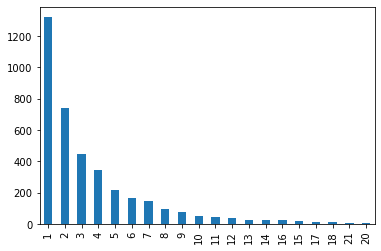

In [63]:
rfm['frequency'].value_counts()[:20].plot(kind='bar')

Most of the frequency values are clustering on the left. The rest of the values are grouped into one bin, although the values vary over a wide range. So we have to create bins for Frequency mannually after discussing with business team. 

- Manually create bins for Frequency.

In [64]:
(rfm['frequency'].value_counts().min(),rfm['frequency'].value_counts().max())

(1, 1322)

In [65]:
# Use apply() function to create bins manually.

rfm['f_score'] = rfm['frequency'].apply(
    lambda x: 1 if x <= 1 
        else 2 if x <= 5 \
        else 3 if x <= 10 
        else 4
)

In [66]:
rfm['f_score'].value_counts()

2    1741
1    1322
3     536
4     295
Name: f_score, dtype: int64

This way, customers with same frequency values go into same bin. 

In [67]:
rfm.head(20)

,CustomerID,recency,frequency,monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.356703,2,0.001541,4
1,12608.0,93.0,1,415.79,0.522599,2,0.660760,1,0.639445,2
2,12745.0,175.0,2,723.85,0.785568,1,0.470981,2,0.471238,3
3,12746.0,229.0,1,254.55,0.847714,1,0.661017,1,0.787879,1
4,12747.0,12.0,15,4679.78,0.077555,4,0.037494,4,0.063688,4
5,12748.0,14.0,153,22561.52,0.087827,4,0.000257,4,0.007704,4
6,12749.0,88.0,4,2806.48,0.495378,3,0.268875,2,0.131998,4
7,12777.0,146.0,1,519.45,0.737031,2,0.661274,1,0.572162,2
8,12819.0,147.0,1,540.52,0.738829,2,0.661531,1,0.561120,2
9,12820.0,15.0,6,1434.35,0.093220,4,0.171546,3,0.277607,3


#### 3.6 Calculate the final RFM score

In [68]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CustomerID    3894 non-null   float64 
 1   recency       3894 non-null   float64 
 2   frequency     3894 non-null   int64   
 3   monetary      3894 non-null   float64 
 4   r_percentile  3894 non-null   float64 
 5   r_score       3894 non-null   category
 6   f_percentile  3894 non-null   float64 
 7   f_score       3894 non-null   int64   
 8   m_percentile  3894 non-null   float64 
 9   m_score       3894 non-null   category
dtypes: category(2), float64(6), int64(2)
memory usage: 251.4 KB


- Convert the format of score from category data type to numeric in order to sum all scores together. 

In [69]:
rfm['r_score']=rfm['r_score'].astype(int)
rfm['m_score']=rfm['m_score'].astype(int)
rfm['f_score']=rfm['f_score'].astype(int)

- Sum the scores to generate final RFM score.

In [70]:
rfm['rfm_score']=rfm['r_score'] + rfm['m_score'] + rfm['f_score']

In [71]:
rfm.head(20)

,CustomerID,recency,frequency,monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,rfm_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.356703,2,0.001541,4,10
1,12608.0,93.0,1,415.79,0.522599,2,0.660760,1,0.639445,2,5
2,12745.0,175.0,2,723.85,0.785568,1,0.470981,2,0.471238,3,6
3,12746.0,229.0,1,254.55,0.847714,1,0.661017,1,0.787879,1,3
4,12747.0,12.0,15,4679.78,0.077555,4,0.037494,4,0.063688,4,12
5,12748.0,14.0,153,22561.52,0.087827,4,0.000257,4,0.007704,4,12
6,12749.0,88.0,4,2806.48,0.495378,3,0.268875,2,0.131998,4,9
7,12777.0,146.0,1,519.45,0.737031,2,0.661274,1,0.572162,2,5
8,12819.0,147.0,1,540.52,0.738829,2,0.661531,1,0.561120,2,5
9,12820.0,15.0,6,1434.35,0.093220,4,0.171546,3,0.277607,3,10


### 4. Calculate the average CLV for each RFM segment

 - Average Order Value (per customer) = Total Sales / Order Count
 - Purchase Frequency (per customer) = Total Orders / Total Cusotmers
 - Customer Value (per customer) = Average Order Value * Purchase Frequency = Total Sales / Total Customers 
 - CLV = Customer Value * Average Customer Lifespan
 - Average Customer Lifespan = 1 / Churn rate

In [72]:
# create new dataframe (clv) to aggregate RFM scores at group level.

clv=rfm.groupby(['rfm_score']).agg(total_customers=pd.NamedAgg(column='CustomerID', aggfunc='nunique'),
                                                  total_sales=pd.NamedAgg(column='monetary', aggfunc='sum'))

In [73]:
clv

,total_customers,total_sales
rfm_score,,
3,410,64775.550
4,430,116488.701
5,484,178885.140
6,493,312165.601
7,476,462854.581
8,476,621386.051
9,367,653978.820
10,274,793604.863
11,257,1182635.861


In [74]:
# calculate CLV for each group.

clv['clv']=(clv['total_sales']/clv['total_customers'])*1/churn_rate

In [75]:
clv

,total_customers,total_sales,clv
rfm_score,,,
3,410,64775.550,438.495892
4,430,116488.701,751.888813
5,484,178885.140,1025.810594
6,493,312165.601,1757.423386
7,476,462854.581,2698.832242
8,476,621386.051,3623.204302
9,367,653978.820,4945.792541
10,274,793604.863,8038.814991
11,257,1182635.861,12771.920212


Now, we have CLV for each customer segments. The higher the rfm_score and the larger the CLV, the more valuable customers the segments have. Next step, we can launch different marketing campaigns targeting these groups. 